In [4]:
import pandas as panda
import numpy as nump
import geopandas as gpanda
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mticker

In [5]:
# Defining array from .csv file
df = panda.read_csv('parc-region-annuel-production-filiere.csv', sep =';')

# Deleting the last two columns [start from last column, and go back 2 columns]
df = df.iloc[:, :-2]

# Replacing 'Nan' by 0 (replace Nan by 0)
df = df.fillna(0)

# Creating a new column 'Total' that sums all the values of the row
df['Total'] = df.iloc[:, 3:].sum(axis=1)

# Asking panda to diplay full dataframes (all rows, all))
panda.set_option('display.max_rows', None)

# Splitting the dataframe into multiple dataframes based on the year
df_2008 = df[df['annee'] == 2008].copy()
df_2009 = df[df['annee'] == 2009].copy()
df_2010 = df[df['annee'] == 2010].copy()
df_2011 = df[df['annee'] == 2011].copy()
df_2012 = df[df['annee'] == 2012].copy()
df_2013 = df[df['annee'] == 2013].copy()
df_2014 = df[df['annee'] == 2014].copy()
df_2015 = df[df['annee'] == 2015].copy()
df_2016 = df[df['annee'] == 2016].copy()
df_2017 = df[df['annee'] == 2017].copy()
df_2018 = df[df['annee'] == 2018].copy()
df_2019 = df[df['annee'] == 2019].copy()
df_2020 = df[df['annee'] == 2020].copy()
df_2021 = df[df['annee'] == 2021].copy()
df_2022 = df[df['annee'] == 2022].copy()
df_2023 = df[df['annee'] == 2023].copy()

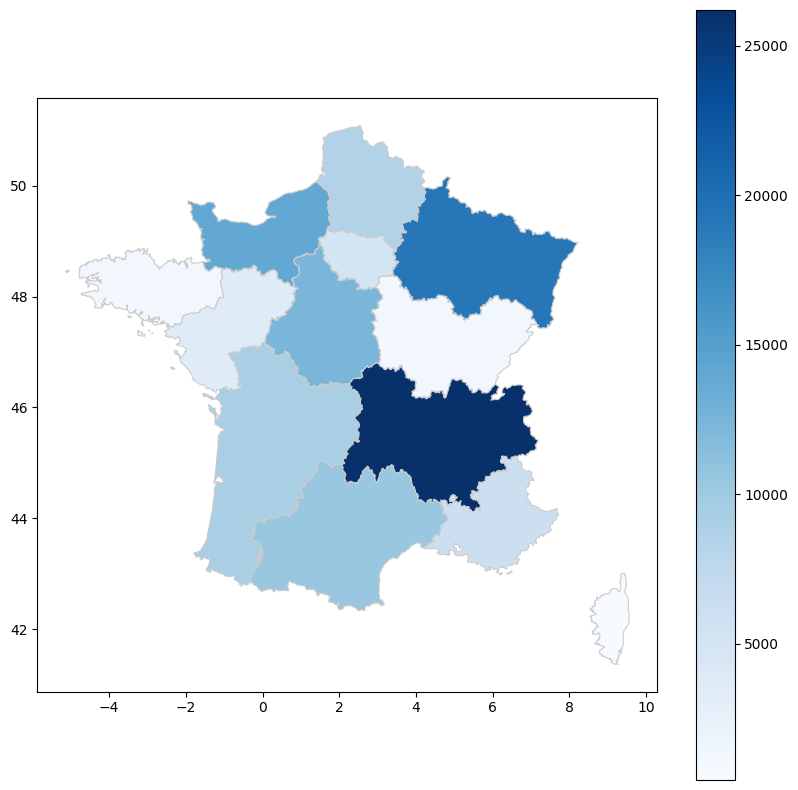

,annee,code_insee_region,region,parc_nucleaire_mw,parc_thermique_fossile_mw,parc_hydraulique_mw,parc_eolien_mw,parc_solaire_mw,parc_bioenergies_mw,Total
195,2008,24,Centre-Val de Loire,11630.0,231.0,92.0,367.0,1.0,32.0,12353.0
196,2008,28,Normandie,10640.0,3007.0,44.0,175.0,0.5,92.0,13958.5
197,2008,32,Hauts-de-France,5460.0,2355.0,4.0,642.0,2.0,91.0,8554.0
198,2008,27,Bourgogne-Franche-Comté,0.0,680.0,508.0,80.0,2.0,22.0,1292.0
199,2008,53,Bretagne,0.0,599.0,277.0,361.0,3.0,20.0,1260.0
200,2008,75,Nouvelle-Aquitaine,6630.0,573.0,1754.0,73.0,4.0,107.0,9141.0
201,2008,76,Occitanie,2750.0,1651.0,5378.0,572.0,19.0,99.0,10469.0
202,2008,84,Auvergne-Rhône-Alpes,13570.0,790.0,11538.0,209.0,11.0,85.0,26203.0
203,2008,44,Grand Est,12580.0,3585.0,2350.0,611.0,3.0,71.0,19200.0
204,2008,93,Provence-Alpes-Côte d'Azur,0.0,2816.0,3240.0,40.0,4.0,58.0,6158.0


In [6]:
# Load GeoJSON file
map = gpanda.read_file('region_francais.geojson')

# Converting to same data type to allow joining (int64) !
map['code'] = map['code'].astype('int64')

# Merging two dataframes at the'code' and 'code insee region' of def
mergedDfs = map.set_index('code').join(df_2008.set_index('code_insee_region'))

# Create a new figure
fig, ax = plt.subplots(1, figsize=(10, 10))

# Set the aspect of the plot to be equal
ax.set_aspect('equal')

# Plot the GeoDataFrame with color according to 'Total'
mergedDfs.plot(column='Total', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Show the plot
plt.show()

# Show tab of the dataframe with Jupyter
df_2008
